# Projeto Final para Ciência de Dados
## El Niño
### Realizado por grupo 11
Catarina Brito nº98521 | Pedro Melo nº99160 | Tomás Aldeia nº 99780

## Variáveis

- **obs** - identificação do registo
- **year** - ano do registo
- **month** - mês do registo
- **day** - dia do registo
- **date** - data do registo
- **latitude** - latitude em que se encontra a boia
- **longitude** - longitude em que se encontra a boia
- **zon.winds** - velocidade dos ventos horizontais
- **mer.winds** - velocidade dos ventos verticais
- **humidity** - humidade relativa
- **air_temp.** - temperatura do ar
- **s.s.temp.** - temperatura da superfície do ar

## Objetivo

Identificar padrões atmosféricos do fenómeno El Nino, de modo a fazerem-se recomendações à sociedade.

<font color=green> ***Aprendizagem Não Supervisionada*** </font> -> **K-means** - agrupar alterações atmosféricas 

<font color=green> ***Aprendizagem Supervisionada*** </font> -> **Decision Tree & Random Forest** - previsão do aumento da temperatura da superfície do mar

## Bibliotecas


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime

## Importação do dataset

In [33]:
# Inserir caminho de ficheiro tao_all2.dat
path='/Users/catarinabrito/Desktop/LCD/Segundo_Ano/Segundo_Semestre/Projeto/TRABALHO/BD/tao-all2.dat'

In [34]:
# Carregar data
df = pd.read_csv(path, sep=' ', names = ['obs','year','month','day','date','latitude','longitude','zon_winds','mer_winds','humidity','air_temp','ss_temp'])

In [35]:
df

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [36]:
df.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [37]:
df.tail() 

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03
178079,178080,98,6,15,980615,8.95,-140.33,.,.,.,27.09,28.09


**Conclusões:**
- Na's identificados com "."

## Conhecer dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   obs        178080 non-null  int64  
 1   year       178080 non-null  int64  
 2   month      178080 non-null  int64  
 3   day        178080 non-null  int64  
 4   date       178080 non-null  int64  
 5   latitude   178080 non-null  float64
 6   longitude  178080 non-null  float64
 7   zon_winds  178080 non-null  object 
 8   mer_winds  178080 non-null  object 
 9   humidity   178080 non-null  object 
 10  air_temp   178080 non-null  object 
 11  ss_temp    178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


**Conclusões**
- Variáveis numéricas, "." coloca variáveis como categóricas

In [39]:
df = df.replace(['.'],np.nan) #susbtituir . por Na's


In [40]:
# Passar colunas object para float
df['zon_winds'] = df['zon_winds'].astype(float)
df['mer_winds'] = df ['mer_winds'].astype(float)
df['humidity'] = df ['humidity'].astype(float)
df['air_temp'] = df ['air_temp'].astype(float)
df['ss_temp'] = df ['ss_temp'].astype(float)

In [41]:
df.isna().sum() #quantos na's temos

obs              0
year             0
month            0
day              0
date             0
latitude         0
longitude        0
zon_winds    25163
mer_winds    25162
humidity     65761
air_temp     18237
ss_temp      17007
dtype: int64

Percentagem de valores omissos

In [42]:
print(df["zon_winds"].isna().sum()/len(df)*100)
print(df["mer_winds"].isna().sum()/len(df)*100)
print(df["humidity"].isna().sum()/len(df)*100)
print(df["air_temp"].isna().sum()/len(df)*100)
print(df["ss_temp"].isna().sum()/len(df)*100)

14.130166217430368
14.129604672057502
36.927785265049415
10.240902964959568
9.550202156334233


**Conclusões**
- Variável Humidity com muitos valores omissos

## Estatísticas Descritivas

In [43]:
df.describe()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,152917.000000,152918.000000,112319.000000,159843.000000,161073.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233,-3.304772,0.249762,81.236525,26.887567,27.715309
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994,3.373492,2.999202,5.313061,1.816429,2.057428
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000,-12.400000,-11.600000,45.400000,17.050000,17.350000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000,-5.800000,-1.700000,77.700000,26.060000,26.770000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000,-4.000000,0.300000,81.200000,27.340000,28.290000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000,-1.400000,2.300000,84.800000,28.180000,29.230000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000,14.300000,13.000000,99.900000,31.660000,31.260000


**Conclusões**
- Valores zon_winds e mer_winds têm de estar entre -10 e 10 - ultrapassam esse valor
- Valores muito baixos em humidity no primeiro quartil

## Remover / Substituir valores omissos

Verificou-se valores omissos nas colunas zon_winds; mer_winds; humidity; air_temp e ss_temp

**Histograma Humidade** Verificar concentração de valores

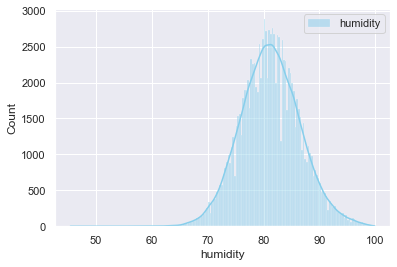

In [45]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="humidity", color="skyblue", label="humidity", kde=True)


plt.legend() 
plt.show()

In [46]:
# remover duplicados caso existam
df.drop_duplicates() 

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


obs              0
year             0
month            0
day              0
date             0
latitude         0
longitude        0
zon_winds    25163
mer_winds    25162
humidity     65761
air_temp     18237
ss_temp      17007
dtype: int64


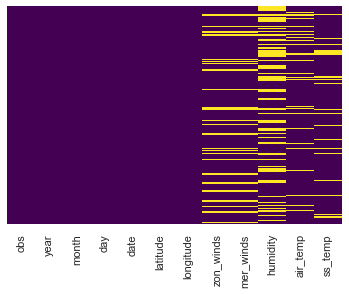

In [47]:
#dispersão de nas
sns.heatmap(df.isnull(),cmap='viridis', cbar=False, yticklabels=False) 
print(df.isnull().sum())

**Conclusão**
Valores dispersos, exceto humidity 
- Humidity - Substituir pela mediana
- Restantes Variáveis - Substituir pelo valor anterior

In [48]:
# Substituir por valores anteriores
df_previous = df
df_previous['zon_winds'] = df_previous['zon_winds'].fillna(method='ffill')
df_previous['mer_winds'] = df_previous['mer_winds'].fillna(method='ffill')
df_previous['air_temp'] = df_previous['air_temp'].fillna(method='ffill')
df_previous['ss_temp'] = df_previous['ss_temp'].fillna(method='ffill')

#Substituir pela mediana
df_previous['humidity'] = df_previous['humidity'].fillna(df_previous['humidity'].mean())

## Remover outliers

Verificou-se outliers em zon.winds, mer.winds e humidty

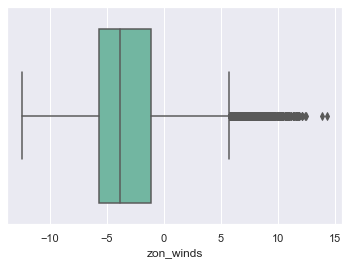

In [49]:
bx = sns.boxplot(x = 'zon_winds',data=df_previous, orient="h", palette="Set2")

In [50]:
df_previous[(df_previous['zon_winds'] > 10)| (df_previous['zon_winds'] < - 10)].count()

obs          138
year         138
month        138
day          138
date         138
latitude     138
longitude    138
zon_winds    138
mer_winds    138
humidity     138
air_temp     138
ss_temp      138
dtype: int64

In [51]:
df_previous = df_previous.drop(df_previous[(df_previous['zon_winds'] > 10)].index)

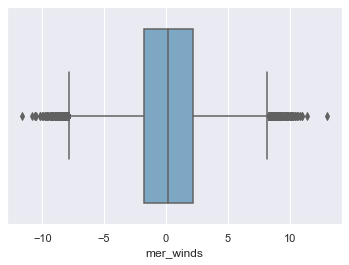

In [52]:
cx = sns.boxplot(x = 'mer_winds',data=df_previous, orient="h", palette="PuBu")

In [53]:
df_previous[(df_previous['mer_winds'] > 10) | (df_previous['mer_winds'] < - 10) ].count()

obs          41
year         41
month        41
day          41
date         41
latitude     41
longitude    41
zon_winds    41
mer_winds    41
humidity     41
air_temp     41
ss_temp      41
dtype: int64

In [54]:
df_previous = df_previous.drop(df_previous[(df_previous['mer_winds'] > 10) | (df_previous['mer_winds'] < - 10) ].index)

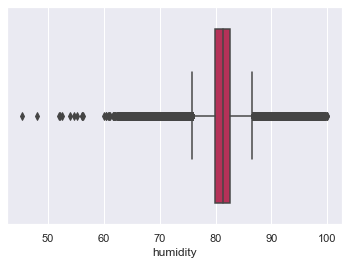

In [56]:
ax = sns.boxplot(x="humidity", data=df_previous, palette= 'rocket')

In [57]:
df_previous[(df_previous['humidity'] < 60)].count()

obs          11
year         11
month        11
day          11
date         11
latitude     11
longitude    11
zon_winds    11
mer_winds    11
humidity     11
air_temp     11
ss_temp      11
dtype: int64

In [58]:
df_previous = df_previous.drop(df_previous[df_previous['humidity'] < 60].index)

## Feature engineering

### Definição de Estações do Ano e Hemisférios
- Hemisfério com base na latitude

In [60]:
#Divisão para hemisfério norte e hemisfério sul
df_previous['hemisferio'] = df_previous['latitude'] < 0.0
df_previous['hemisferio'].replace([True,False],['Sul','Norte'],inplace=True)
#Para verificar a adição das colunas oceano e hemisfério
df_previous.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp,hemisferio
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,81.236525,26.14,26.24,Sul
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,81.236525,25.66,25.97,Sul
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,81.236525,25.69,25.28,Sul
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,81.236525,25.57,24.31,Sul
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,81.236525,25.30,23.19,Sul


- Estação do ano com base no hemisfério

In [61]:
hm = df_previous.loc[df_previous['hemisferio'] == 'Norte']
hm_sul = df_previous.loc[df_previous['hemisferio'] == 'Sul']

In [62]:
est=[]
for a in hm['month']:
            if a in [7,8,9]:
                estacao = 'Verão'
                est.append(estacao)
            elif a in [4,5,6]:
                estacao = 'Primavera'
                est.append(estacao)
            elif a in [1,2,3]:
                estacao = 'Inverno'
                est.append(estacao)
            else: 
                estacao = 'Outono'
                est.append(estacao)

In [63]:
hm['estacao']= est

/var/folders/4f/7k81zvl55vn3c2nm1104whpc0000gn/T/ipykernel_88155/3725616386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm['estacao']= est


In [64]:
hm.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp,hemisferio,estacao
23,24,80,8,11,800811,0.0,-109.56,-3.3,1.5,81.236525,21.48,21.81,Norte,Verão
24,25,80,8,12,800812,0.0,-109.56,-3.5,0.8,81.236525,21.27,21.58,Norte,Verão
25,26,80,8,13,800813,0.0,-109.56,-4.9,1.9,81.236525,21.11,21.32,Norte,Verão
26,27,80,8,14,800814,0.0,-109.56,-1.2,2.1,81.236525,20.95,21.19,Norte,Verão
27,28,80,8,15,800815,0.0,-109.56,-1.2,2.7,81.236525,21.76,21.47,Norte,Verão


In [65]:
hm['estacao'].value_counts()

Primavera    25214
Outono       25152
Inverno      24591
Verão        24413
Name: estacao, dtype: int64

In [66]:
est=[]
for a in hm_sul['month']:
            if a in [7,8,9]:
                estacao = 'Inverno'
                est.append(estacao)
            elif a in [4,5,6]:
                estacao = 'Outono'
                est.append(estacao)
            elif a in [1,2,3]:
                estacao = 'Verão'
                est.append(estacao)
            else: 
                estacao = 'Primavera'
                est.append(estacao)

In [67]:
hm_sul['estacao']= est

/var/folders/4f/7k81zvl55vn3c2nm1104whpc0000gn/T/ipykernel_88155/2037233825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_sul['estacao']= est


In [68]:
hm_sul['estacao'].value_counts()

Outono       20061
Primavera    19770
Verão        19675
Inverno      19056
Name: estacao, dtype: int64

In [69]:
df_previous=hm.append(hm_sul,ignore_index=True )

In [70]:
df_previous.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp,hemisferio,estacao
0,24,80,8,11,800811,0.0,-109.56,-3.3,1.5,81.236525,21.48,21.81,Norte,Verão
1,25,80,8,12,800812,0.0,-109.56,-3.5,0.8,81.236525,21.27,21.58,Norte,Verão
2,26,80,8,13,800813,0.0,-109.56,-4.9,1.9,81.236525,21.11,21.32,Norte,Verão
3,27,80,8,14,800814,0.0,-109.56,-1.2,2.1,81.236525,20.95,21.19,Norte,Verão
4,28,80,8,15,800815,0.0,-109.56,-1.2,2.7,81.236525,21.76,21.47,Norte,Verão


In [71]:
df_previous.shape

(177932, 14)

### Definição da Direção dos ventos
- Permite que zon_winds e mer_winds tenham valores positivos uma vez que se trata de velocidade

In [72]:
#Divisão para saber de onde vêm os ventos
df_previous['vento_lon'] = df_previous['zon_winds'] < 0.0
df_previous['vento_lon'].replace([True,False],['Oeste','Este'],inplace=True)

df_previous['vento_lat'] = df_previous['mer_winds'] < 0.0
df_previous['vento_lat'].replace([True,False],['Sul','Norte'],inplace=True)
#Para verificar a adição das colunas dos ventos
df_previous.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp,hemisferio,estacao,vento_lon,vento_lat
0,24,80,8,11,800811,0.0,-109.56,-3.3,1.5,81.236525,21.48,21.81,Norte,Verão,Oeste,Norte
1,25,80,8,12,800812,0.0,-109.56,-3.5,0.8,81.236525,21.27,21.58,Norte,Verão,Oeste,Norte
2,26,80,8,13,800813,0.0,-109.56,-4.9,1.9,81.236525,21.11,21.32,Norte,Verão,Oeste,Norte
3,27,80,8,14,800814,0.0,-109.56,-1.2,2.1,81.236525,20.95,21.19,Norte,Verão,Oeste,Norte
4,28,80,8,15,800815,0.0,-109.56,-1.2,2.7,81.236525,21.76,21.47,Norte,Verão,Oeste,Norte


In [73]:
# valores positivos dos ventos
df_previous['zon_winds']= df_previous['zon_winds'].abs()
df_previous['mer_winds']= df_previous['mer_winds'].abs()

## Visualização da dispersão

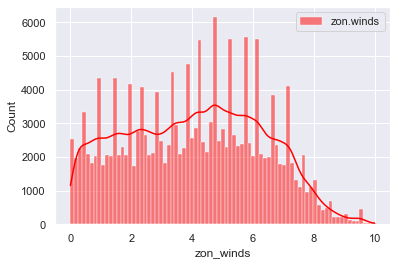

In [40]:
sns.set(style="darkgrid")

sns.histplot(data=df_previous, x="zon_winds", color="red", label="zon.winds", kde=True)


plt.legend() 
plt.show()

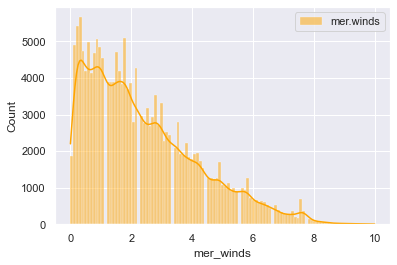

In [41]:
sns.set(style="darkgrid")

sns.histplot(data=df_previous, x="mer_winds", color="orange", label="mer.winds", kde=True)


plt.legend() 
plt.show()

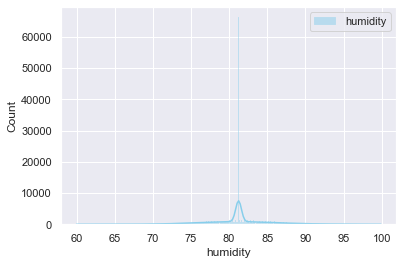

In [42]:
sns.set(style="darkgrid")

sns.histplot(data=df_previous, x="humidity", color="skyblue", label="humidity", kde=True)


plt.legend() 
plt.show()

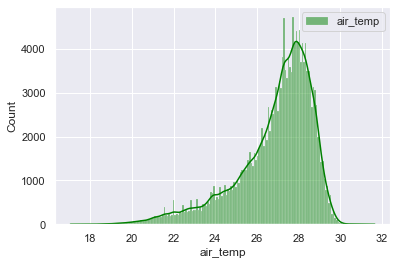

In [43]:
sns.set(style="darkgrid")

sns.histplot(data=df_previous, x="air_temp", color="green", label="air_temp", kde=True)


plt.legend() 
plt.show()

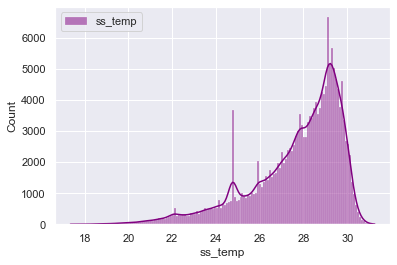

In [44]:
sns.set(style="darkgrid")

sns.histplot(data=df_previous, x="ss_temp", color="purple", label="ss_temp", kde=True)


plt.legend() 
plt.show()

## Relação entre variáveis

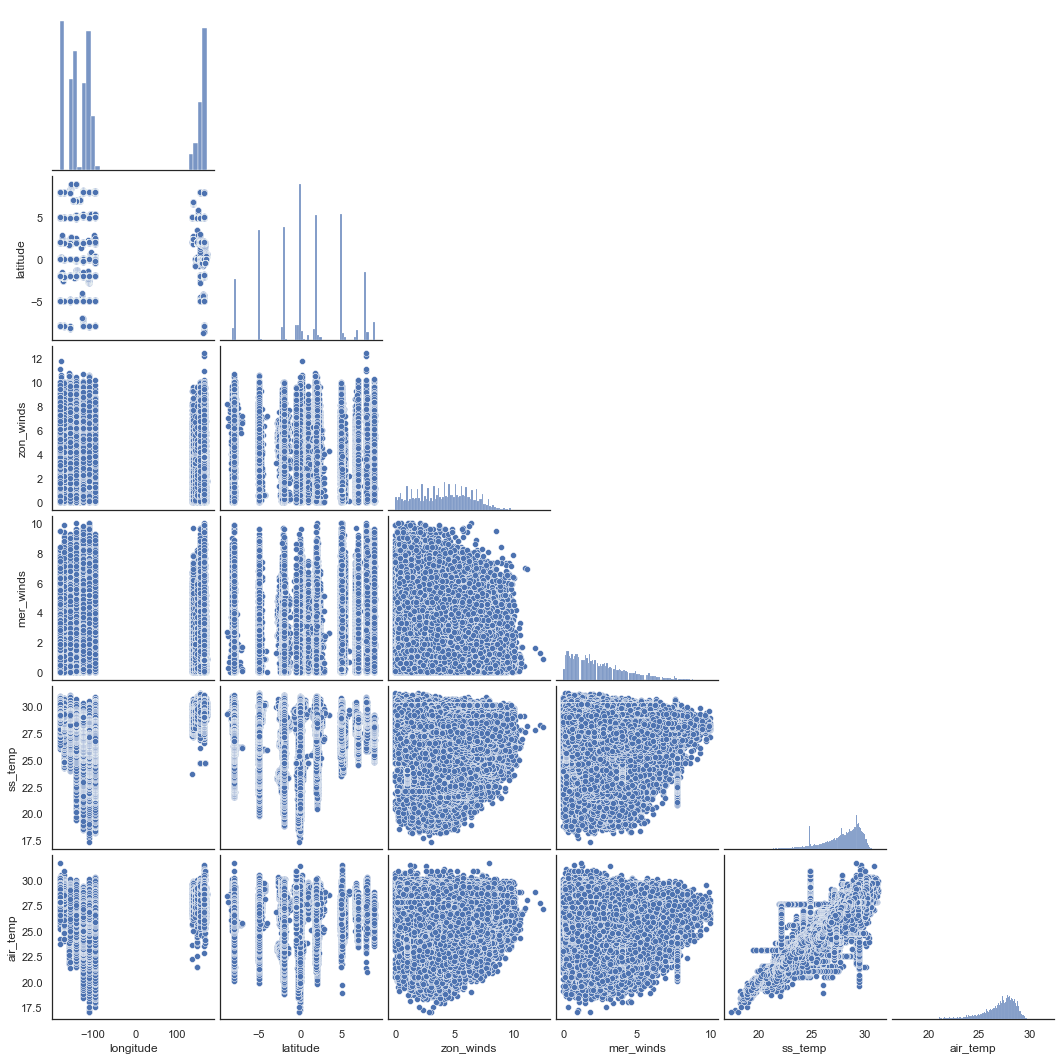

In [77]:
sns.pairplot(
    df_previous,
    x_vars=['longitude', 'latitude', 'zon_winds',"mer_winds", "ss_temp", "air_temp"],
    y_vars=['longitude', 'latitude',"zon_winds","mer_winds", "ss_temp", "air_temp"],
    corner = True
)

## Correlação entre variáveis

<AxesSubplot:>

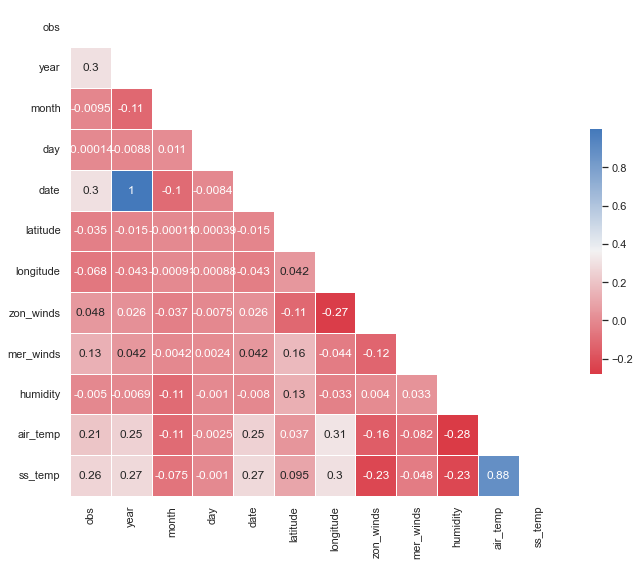

In [75]:
# Compute correlations
corr = df_previous.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot = True)

## Criação de conjunto de dados limpo

In [48]:
df_previous.to_csv(r'Previous.csv',index=False)